In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 

data = pd.read_csv("./data.csv")
year_data = pd.read_csv('./data_by_year.csv')
genre_data = pd.read_csv('./data_by_genres.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

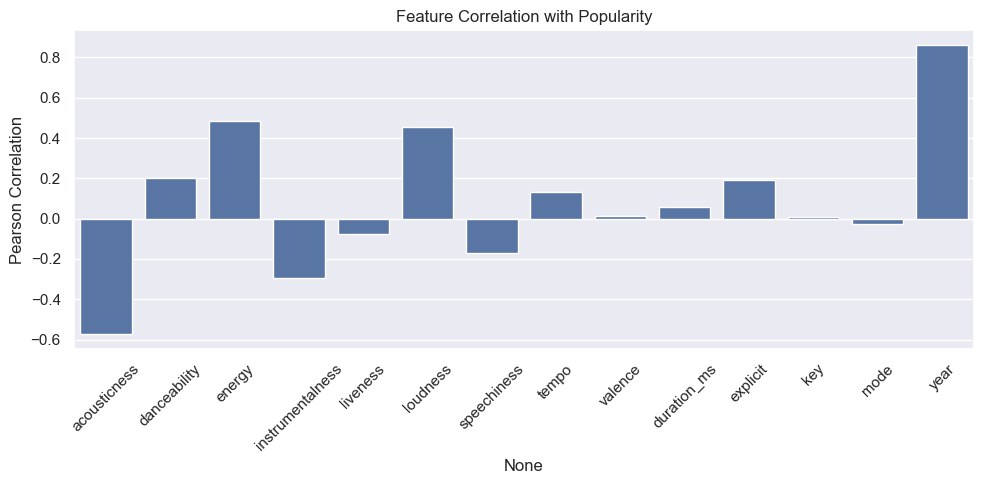

In [28]:
import seaborn as sns

# Lista de características
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

# Calcular la correlación de Pearson
correlations = data[feature_names].apply(lambda x: x.corr(data['popularity']))

# Visualizar las correlaciones en un gráfico de barras sin el argumento palette
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title("Feature Correlation with Popularity")
plt.ylabel("Pearson Correlation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

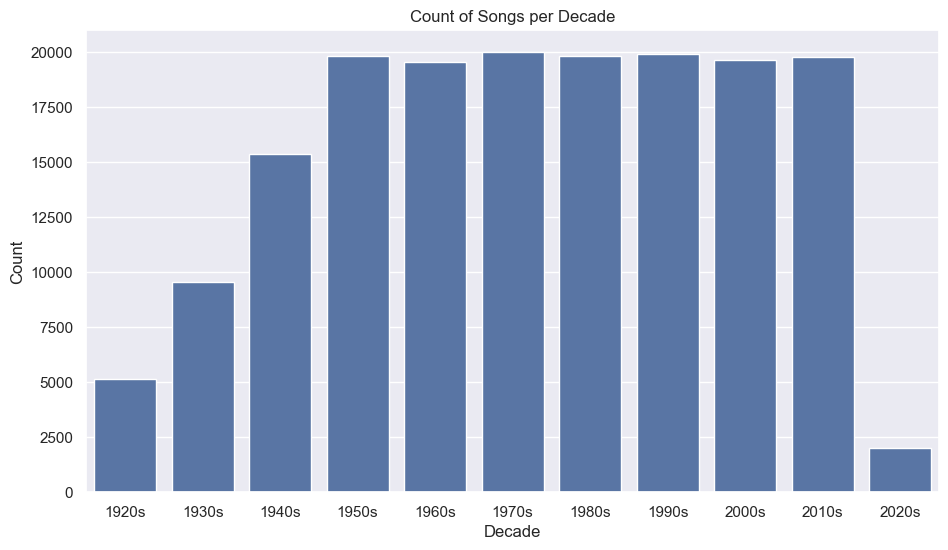

In [29]:
# Definir la función para obtener la década
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

# Crear la columna 'decade'
data['decade'] = data['year'].apply(get_decade)

# Configurar el tamaño del gráfico y mostrar el conteo por década
sns.set(rc={'figure.figsize':(11, 6)})
sns.countplot(x=data['decade'])
plt.title("Count of Songs per Decade")
plt.ylabel("Count")
plt.xlabel("Decade")
plt.show()


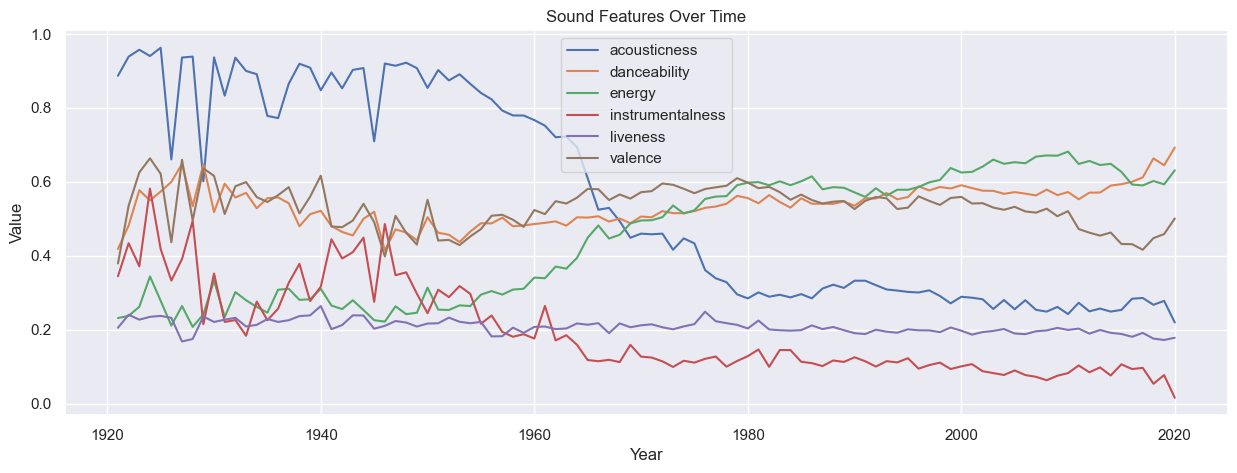

In [30]:
# Asumiendo que 'year_data' es tu DataFrame y 'year' es una columna en 'year_data'
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(15, 5))

for feature in sound_features:
    plt.plot(year_data['year'], year_data[feature], label=feature)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sound Features Over Time')
plt.show()

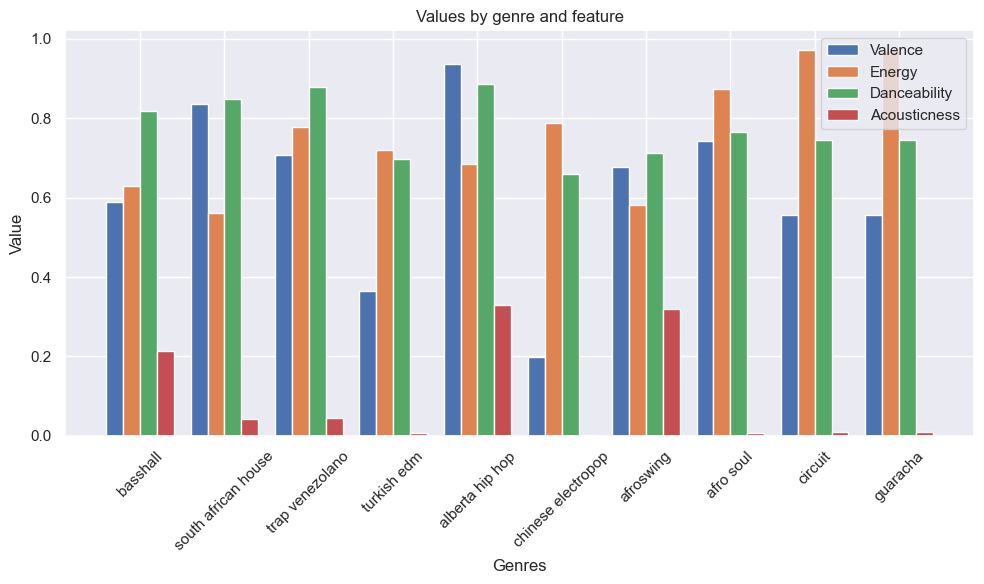

In [27]:
top10_genres = genre_data.nlargest(10, 'popularity')

x = np.arange(len(top10_genres['genres']))  # la etiqueta de ubicaciones
width = 0.2  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 3*width/2, top10_genres['valence'], width, label='Valence')
rects2 = ax.bar(x - width/2, top10_genres['energy'], width, label='Energy')
rects3 = ax.bar(x + width/2, top10_genres['danceability'], width, label='Danceability')
rects4 = ax.bar(x + 3*width/2, top10_genres['acousticness'], width, label='Acousticness')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Genres')
ax.set_ylabel('Value')
ax.set_title('Values by genre and feature')
ax.set_xticks(x)
ax.set_xticklabels(top10_genres['genres'], rotation=45)
ax.legend()

fig.tight_layout()
plt.show()